In [ ]:
#accès au drive, ou on a mis notre base de données
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/data 
!unzip /content/data1.zip # Décompresser votre base de données 


Archive:  /content/data1.zip
   creating: data/TEST/
   creating: data/TEST/COVID-19/
  inflating: data/TEST/COVID-19/COVID-19.jpeg  
  inflating: data/TEST/COVID-19/nejmoa2001191_f3-PA.jpeg  
  inflating: data/TEST/COVID-19/ryct.2020200034.fig5-day4.jpeg  
  inflating: data/TEST/COVID-19/ryct.2020200034.fig5-day7.jpeg  
   creating: data/TEST/Healthy/
  inflating: data/TEST/Healthy/Healthy.jpeg  
  inflating: data/TEST/Healthy/person1_bacteria_2.jpeg  
  inflating: data/TEST/Healthy/person1290_virus_2215.jpeg  
  inflating: data/TEST/Healthy/person438_bacteria_1893.jpeg  
   creating: data/TRAIN/
   creating: data/TRAIN/COVID-19/
  inflating: data/TRAIN/COVID-19/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-d

In [ ]:
import os

In [ ]:
#afficher le total des images malades et sains: validation, training and test
print('total Validation COVID-19 images:', len(os.listdir('/content/data/VAL/COVID-19')))
print('total Validation Healthy images:', len(os.listdir('/content/data/VAL/Healthy')))

print('total Training COVID-19 images:', len(os.listdir('/content/data/TRAIN/COVID-19')))
print('total Training Healthy images:', len(os.listdir('/content/data/TRAIN/Healthy')))

print('total Test COVID-19 images:', len(os.listdir('/content/data/TEST/COVID-19')))
print('total Test Healthy images:', len(os.listdir('/content/data/TEST/Healthy')))

total Validation COVID-19 images: 3
total Validation Healthy images: 3
total Training COVID-19 images: 19
total Training Healthy images: 18
total Training COVID-19 images: 4
total Training Healthy images: 4


In [ ]:
train_dir = '/content/data/TRAIN'
validation_dir = '/content/data/VAL'
test_dir = '/content/data/TEST'

In [ ]:
#Importer les bibliothèques nécessaires 
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
model = Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(227, 227, 3)))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 225, 225, 256)     7168      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 256)    0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 110, 110, 64)      147520    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 193600)            0         
                                                                 
 dense_24 (Dense)            (None, 256)             

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#Standardisation des données
train_datagen = ImageDataGenerator(rescale=1./255)     
Val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary')
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary')

Found 37 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator,epochs=25, validation_data=validation_generator, callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/25
19/19 [==============================] - 3s 109ms/step - loss: 0.6946 - accuracy: 0.5135 - val_loss: 0.7025 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
19/19 [==============================] - 2s 96ms/step - loss: 0.6683 - accuracy: 0.6216 - val_loss: 0.6204 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/25
19/19 [==============================] - 2s 95ms/step - loss: 0.7119 - accuracy: 0.4865 - val_loss: 0.5116 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 4/25
19/19 [==============================] - 2s 93ms/step - loss: 0.5042 - accuracy: 0.7297 - val_loss: 0.4964 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 5/25
19/19 [==============================] - 2s 92ms/step - loss: 0.3371 - accuracy: 0.8649 - val_loss: 0.2638 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 6/25
19/19 [==============================] - 2s 93ms/step - loss: 0.1451 - accuracy: 0.9459 - val_loss: 0.2900 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 7/25
19/19 [==============================] - 2s 90ms/step - loss: 0.

In [ ]:
#On va voir le test accuracy 
test_loss, test_accuracy = model.evaluate(test_generator  ,batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

4/4 [==============================] - 0s 66ms/step - loss: 0.0238 - accuracy: 1.0000
Test loss: 0.0238 accuracy: 1.0000


In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt


#Importer des  images test et des images téléchargées de l'internet 
img_path='data/TEST/COVID-19/COVID-19.jpeg'
img_path1='data/TEST/COVID-19/nejmoa2001191_f3-PA.jpeg'
img_path2='data/TEST/COVID-19/ryct.2020200034.fig5-day4.jpeg'
img_path3='data/TEST/COVID-19/ryct.2020200034.fig5-day7.jpeg'
img_path4='COVID-1016.png'
img_path5='COVID-1007.png'


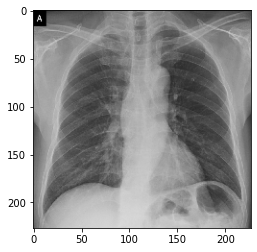

Predicted: [[0.00777388]] COVID-19


In [ ]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')  #fonction sigmoid donc on compare par 0.5

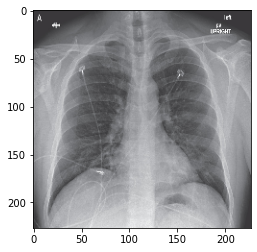

Predicted: [[0.00338593]] COVID-19


In [ ]:
img = image.load_img(img_path1, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

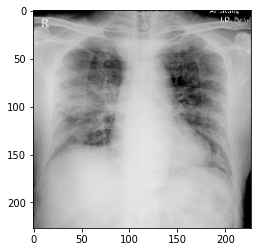

Predicted: [[0.00332586]] COVID-19


In [ ]:
img = image.load_img(img_path2, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

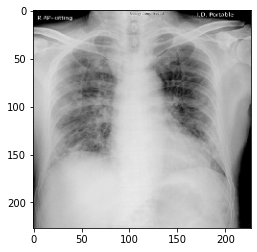

Predicted: [[0.00940614]] COVID-19


In [ ]:
img = image.load_img(img_path3, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

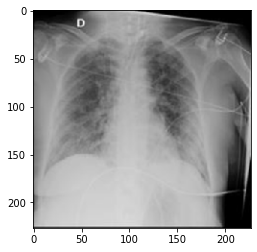

Predicted: [[0.01399916]] COVID-19


In [ ]:
img = image.load_img(img_path4, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

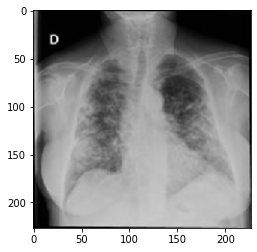

Predicted: [[0.00355369]] COVID-19


In [ ]:
img = image.load_img(img_path5, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

# **Prédiction des Healthy**

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='data/TEST/Healthy/Healthy.jpeg'
img_path1='data/TEST/Healthy/person1_bacteria_2.jpeg'
img_path2='data/TEST/Healthy/person438_bacteria_1893.jpeg'
img_path3='data/TEST/Healthy/person1290_virus_2215.jpeg'
img_path4='Normal-100.png'
img_path5='Normal-10006.png'

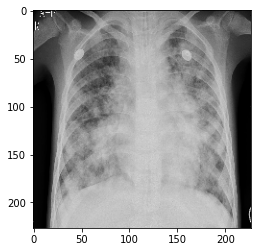

Predicted: [[0.98669773]] Healthy


In [ ]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

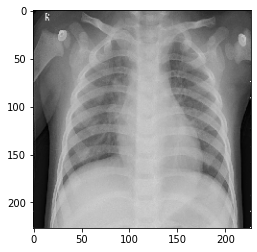

Predicted: [[0.9044684]] Healthy


In [ ]:
img = image.load_img(img_path1, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

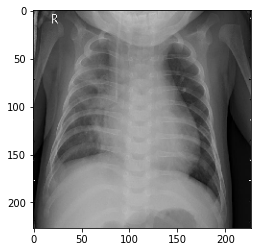

Predicted: [[0.9722673]] Healthy


In [ ]:
img = image.load_img(img_path2, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

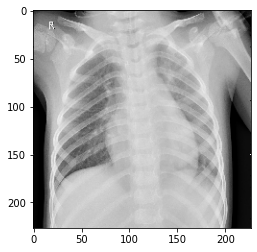

Predicted: [[0.9760681]] Healthy


In [ ]:
img = image.load_img(img_path3, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

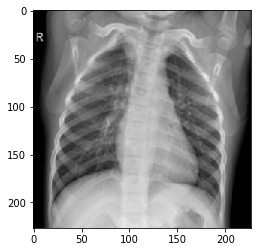

Predicted: [[0.98810637]] Healthy


In [ ]:
img = image.load_img(img_path4, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

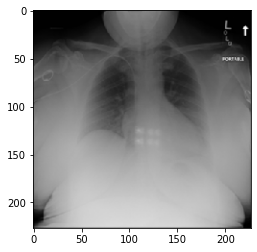

Predicted: [[0.00100128]] COVID-19


In [ ]:
img = image.load_img(img_path5, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

## VGG

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(227, 227, 3)))
	model.add(Conv2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(Conv2D(64, (3, 3), activation='relu' ))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu'))
	model.add(Conv2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='sigmoid'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
model=define_model()

In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
opt = SGD(lr=0.001, momentum=0.9)        #SGD optimizer
history = model.fit(train_generator,epochs=25, validation_data=validation_generator, callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/25
19/19 [==============================] - 12s 382ms/step - loss: 0.8326 - accuracy: 0.4865 - val_loss: 0.8807 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
19/19 [==============================] - 5s 252ms/step - loss: 0.7364 - accuracy: 0.4595 - val_loss: 0.6969 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/25
19/19 [==============================] - 5s 252ms/step - loss: 0.7471 - accuracy: 0.5135 - val_loss: 0.9013 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/25
19/19 [==============================] - 5s 252ms/step - loss: 0.5654 - accuracy: 0.7838 - val_loss: 0.3414 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 5/25
19/19 [==============================] - 5s 253ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 1.1620 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 6/25
19/19 [==============================] - 5s 252ms/step - loss: 0.0701 - accuracy: 0.9730 - val_loss: 1.6899 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/25
19/19 [==============================] - 5s 251ms/step - l

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator  ,batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

4/4 [==============================] - 1s 103ms/step - loss: 0.0496 - accuracy: 1.0000
Test loss: 0.0496 accuracy: 1.0000


In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='data/TEST/COVID-19/COVID-19.jpeg'
img_path1='data/TEST/COVID-19/nejmoa2001191_f3-PA.jpeg'
img_path2='data/TEST/COVID-19/ryct.2020200034.fig5-day4.jpeg'
img_path3='data/TEST/COVID-19/ryct.2020200034.fig5-day7.jpeg'
img_path4='COVID-1016.png'
img_path5='COVID-1007.png'


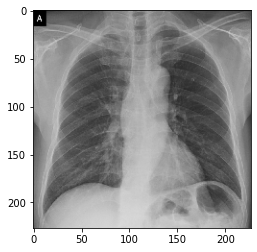

Predicted: [[0.09786525]] COVID-19


In [ ]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

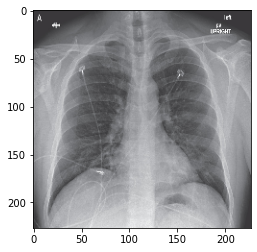

Predicted: [[0.10419367]] COVID-19


In [ ]:
img = image.load_img(img_path1, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

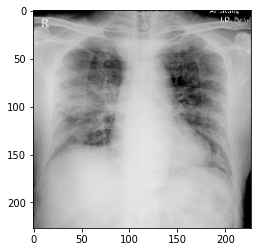

Predicted: [[0.07545026]] COVID-19


In [ ]:
img = image.load_img(img_path2, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

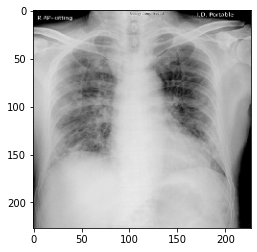

Predicted: [[0.09667009]] COVID-19


In [ ]:
img = image.load_img(img_path3, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

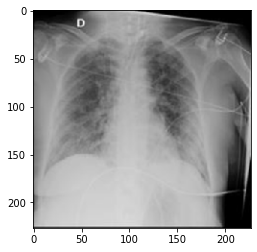

Predicted: [[0.6753971]] Healthy


In [ ]:
img = image.load_img(img_path4, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

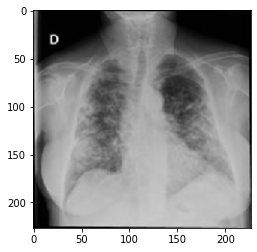

Predicted: [[0.07686052]] COVID-19


In [ ]:
img = image.load_img(img_path5, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

# **Prédiction des Healthy**

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='data/TEST/Healthy/Healthy.jpeg'
img_path1='data/TEST/Healthy/person1_bacteria_2.jpeg'
img_path2='data/TEST/Healthy/person438_bacteria_1893.jpeg'
img_path3='data/TEST/Healthy/person1290_virus_2215.jpeg'
img_path4='Normal-100.png'
img_path5='Normal-10006.png'

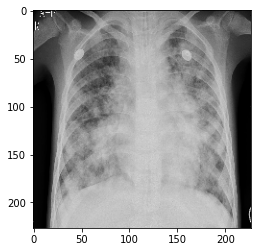

Predicted: [[0.9991316]] Healthy


In [ ]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

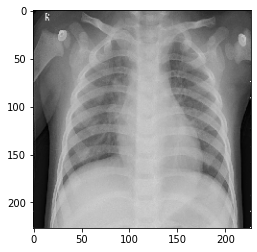

Predicted: [[0.9991316]] Healthy


In [ ]:
img = image.load_img(img_path1, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

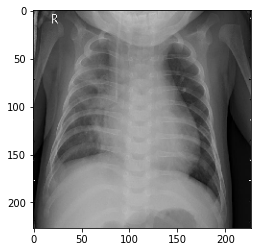

Predicted: [[0.9991316]] Healthy


In [ ]:
img = image.load_img(img_path2, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

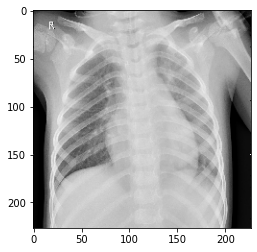

Predicted: [[0.9991316]] Healthy


In [ ]:
img = image.load_img(img_path3, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

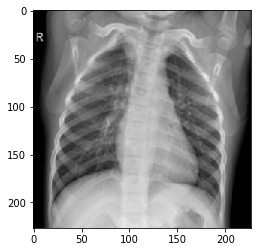

Predicted: [[0.9991316]] Healthy


In [ ]:
img = image.load_img(img_path4, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')

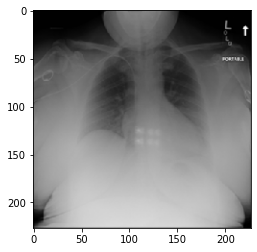

Predicted: [[0.06784185]] COVID-19


In [ ]:
img = image.load_img(img_path5, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')